# ML regression in time series forecasting

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_org = pd.read_csv('monthly_in_situ_co2_mlo.csv',
                 skiprows=61,
                 usecols=['Yr', 'Mn', 'CO2'],
                 skipinitialspace=True)
df_org.drop([0, 1], inplace=True)
df_org

,Yr,Mn,CO2
2,1958.0,1.0,-99.99
3,1958.0,2.0,-99.99
4,1958.0,3.0,315.71
5,1958.0,4.0,317.45
6,1958.0,5.0,317.51
...,...,...,...
801,2024.0,8.0,-99.99
802,2024.0,9.0,-99.99
803,2024.0,10.0,-99.99
804,2024.0,11.0,-99.99


In [3]:
df_org['Yr'] = df_org['Yr'].astype(int).astype(str)
df_org['Mn'] = df_org['Mn'].astype(int).astype(str)
df_org

,Yr,Mn,CO2
2,1958,1,-99.99
3,1958,2,-99.99
4,1958,3,315.71
5,1958,4,317.45
6,1958,5,317.51
...,...,...,...
801,2024,8,-99.99
802,2024,9,-99.99
803,2024,10,-99.99
804,2024,11,-99.99


In [4]:
df_org.index = pd.to_datetime(df_org['Yr'] + '-' + df_org['Mn'])

In [5]:
df_org.index.freq = 'MS'

In [6]:
df_org = df_org.drop(columns=['Yr', 'Mn'])
df_org

,CO2
1958-01-01,-99.99
1958-02-01,-99.99
1958-03-01,315.71
1958-04-01,317.45
1958-05-01,317.51
...,...
2024-08-01,-99.99
2024-09-01,-99.99
2024-10-01,-99.99
2024-11-01,-99.99


In [7]:
df_org['CO2'] = pd.to_numeric(df_org['CO2'], errors='coerce')

<Axes: >

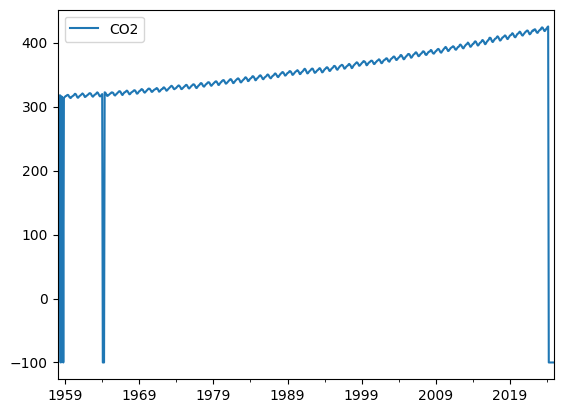

In [8]:
df_org.plot()

In [9]:
df_org = df_org.replace(-99.99, np.nan)

In [10]:
df_org.isna().sum()

CO2    16
dtype: int64

<Axes: >

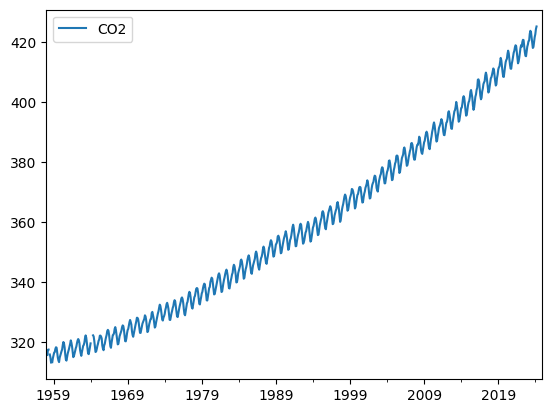

In [11]:
df_org.plot()

# Random Forest Regressor

In [12]:
df = df_org.copy()

In [13]:
for i in range (12, 0, -1):
    print(i)
    df['t=' + str(i)] = df['CO2'].shift(i)

12
11
10
9
8
7
6
5
4
3
2
1


In [14]:
df

,CO2,t=12,t=11,t=10,t=9,t=8,t=7,t=6,t=5,t=4,t=3,t=2,t=1
1958-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1958-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1958-03-01,315.71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1958-04-01,317.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,315.71
1958-05-01,317.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,315.71,317.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-01,NaN,419.56,418.06,418.40,420.12,421.65,422.62,424.35,425.22,NaN,NaN,NaN,NaN
2024-09-01,NaN,418.06,418.40,420.12,421.65,422.62,424.35,425.22,NaN,NaN,NaN,NaN,NaN
2024-10-01,NaN,418.40,420.12,421.65,422.62,424.35,425.22,NaN,NaN,NaN,NaN,NaN,NaN
2024-11-01,NaN,420.12,421.65,422.62,424.35,425.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df.dropna(inplace=True)
df

,CO2,t=12,t=11,t=10,t=9,t=8,t=7,t=6,t=5,t=4,t=3,t=2,t=1
1959-11-01,314.81,313.33,314.67,315.58,316.49,316.65,317.72,318.29,318.15,316.54,314.80,313.84,313.33
1959-12-01,315.58,314.67,315.58,316.49,316.65,317.72,318.29,318.15,316.54,314.80,313.84,313.33,314.81
1960-01-01,316.43,315.58,316.49,316.65,317.72,318.29,318.15,316.54,314.80,313.84,313.33,314.81,315.58
1960-02-01,316.98,316.49,316.65,317.72,318.29,318.15,316.54,314.80,313.84,313.33,314.81,315.58,316.43
1960-03-01,317.58,316.65,317.72,318.29,318.15,316.54,314.80,313.84,313.33,314.81,315.58,316.43,316.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-01,420.12,417.03,418.48,419.23,420.33,420.51,422.73,423.78,423.39,421.62,419.56,418.06,418.40
2023-12-01,421.65,418.48,419.23,420.33,420.51,422.73,423.78,423.39,421.62,419.56,418.06,418.40,420.12
2024-01-01,422.62,419.23,420.33,420.51,422.73,423.78,423.39,421.62,419.56,418.06,418.40,420.12,421.65
2024-02-01,424.35,420.33,420.51,422.73,423.78,423.39,421.62,419.56,418.06,418.40,420.12,421.65,422.62


<Axes: >

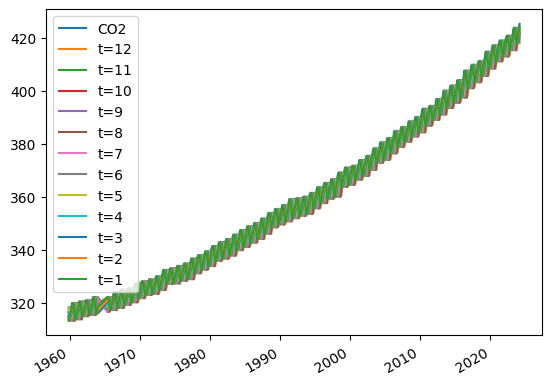

In [16]:
df.plot()

In [17]:
x = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

In [18]:
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [20]:
rfr = RandomForestRegressor(random_state=42, n_estimators=200, max_features=4)
rfr.fit(x_train, y_train)

RandomForestRegressor(max_features=4, n_estimators=200, random_state=42)

In [21]:
rfr_train_prediction = rfr.predict(x_train)
rfr_test_prediction = rfr.predict(x_test)

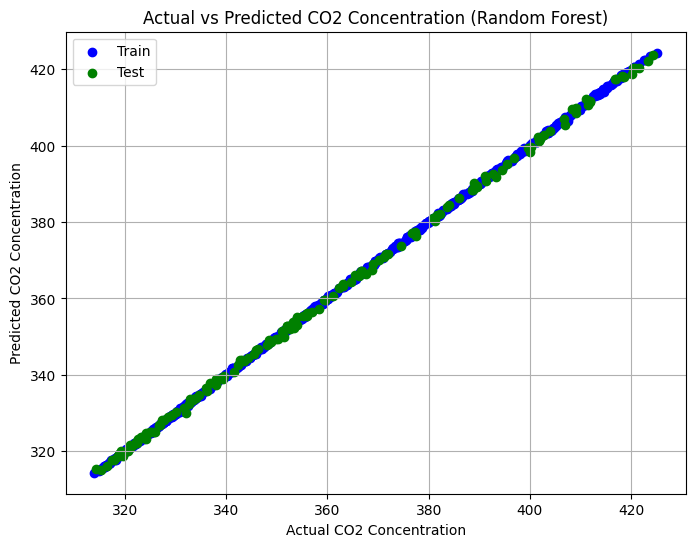

In [22]:
plt.figure(figsize=(8, 6))
plt.scatter(y_train, rfr_train_prediction, label='Train', color='blue')
plt.scatter(y_test, rfr_test_prediction, label='Test', color='green')
plt.xlabel('Actual CO2 Concentration')
plt.ylabel('Predicted CO2 Concentration')
plt.title('Actual vs Predicted CO2 Concentration (Random Forest)')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
from sklearn.metrics import mean_absolute_percentage_error

In [24]:
mape_train_rfr = mean_absolute_percentage_error(y_train, rfr_train_prediction) * 100
mape_train_rfr

0.052827178953893855

In [25]:
mape_test_rfr = mean_absolute_percentage_error(y_test, rfr_test_prediction) * 100
mape_test_rfr

0.14478134364432446

In [26]:
def get_first_eval_batch(data, n):
    return data[-n:].reshape(-1, n)

In [27]:
train = df_org[:-24]
test = df_org[-24:]

In [28]:
n_lag = 12
test_prediction_rfr = []
current_batch = get_first_eval_batch(train['CO2'].values, n_lag)
for i in range(len(test)):
    current_pred = rfr.predict(current_batch)[0]
    test_prediction_rfr.append(current_pred)
    current_batch = np.append(current_batch[:, 1:], current_pred).reshape(-1, n_lag)

<Axes: >

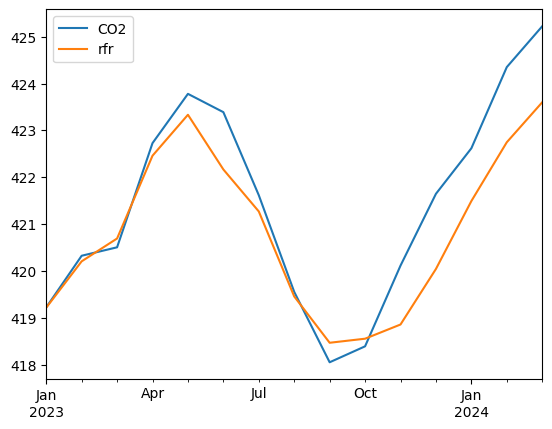

In [29]:
df_comp = test['CO2'].to_frame()
df_comp['rfr'] = test_prediction_rfr
df_comp.dropna(inplace=True)
df_comp.plot()

In [30]:
mape_comp_rfr = mean_absolute_percentage_error(df_comp['CO2'], df_comp['rfr']) * 100
mape_comp_rfr

0.16520692484916563

# Gradient Boosting Regressor

In [31]:
gb = GradientBoostingRegressor(n_estimators=200, random_state=42, max_features=4)
gb.fit(x_train, y_train)

GradientBoostingRegressor(max_features=4, n_estimators=200, random_state=42)

In [32]:
gb_train_prediction = gb.predict(x_train)
gb_test_prediction = gb.predict(x_test)

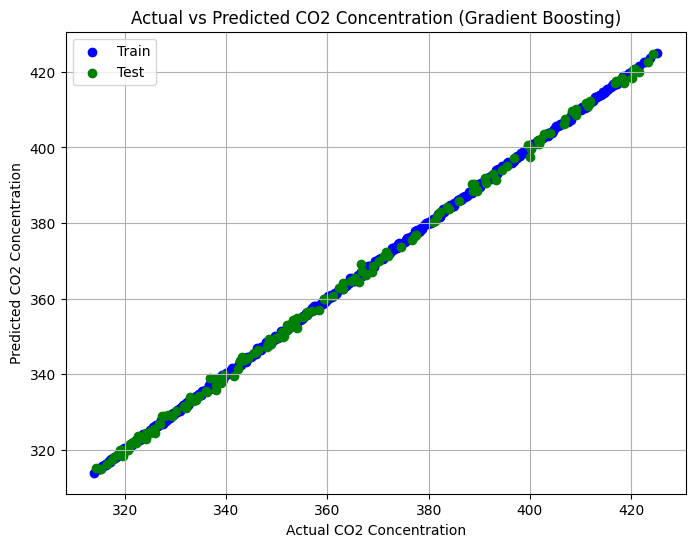

In [33]:
plt.figure(figsize=(8, 6))
plt.scatter(y_train, gb_train_prediction, label='Train', color='blue')
plt.scatter(y_test, gb_test_prediction, label='Test', color='green')
plt.xlabel('Actual CO2 Concentration')
plt.ylabel('Predicted CO2 Concentration')
plt.title('Actual vs Predicted CO2 Concentration (Gradient Boosting)')
plt.legend()
plt.grid(True)
plt.show()

In [34]:
mape_train_gb = mean_absolute_percentage_error(y_train, gb_train_prediction) * 100
mape_train_gb

0.06522044402028436

In [35]:
mape_test_gb = mean_absolute_percentage_error(y_test, gb_test_prediction) * 100
mape_test_gb

0.18483843502553807

In [36]:
n_lag = 12
test_prediction_gb = []
current_batch = get_first_eval_batch(train['CO2'].values, n_lag)
for i in range(len(test)):
    current_pred = gb.predict(current_batch)[0]
    test_prediction_gb.append(current_pred)
    current_batch = np.append(current_batch[:, 1:], current_pred).reshape(-1, n_lag)

<Axes: >

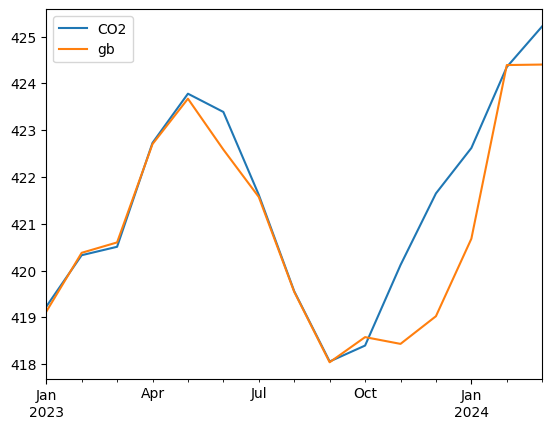

In [37]:
df_comp = test['CO2'].to_frame()
df_comp['gb'] = test_prediction_gb
df_comp.dropna(inplace=True)
df_comp.plot()

In [38]:
mape_comp_gb = mean_absolute_percentage_error(df_comp['CO2'], df_comp['gb']) * 100
mape_comp_gb

0.13508168094769582

# XGBoost Regressor

In [39]:
import xgboost

In [40]:
xgb = xgboost.XGBRegressor(n_estimators=200, random_state=42, max_features=4)
xgb.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_features=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

In [41]:
xgb_train_prediction = xgb.predict(x_train)
xgb_test_prediction = xgb.predict(x_test)

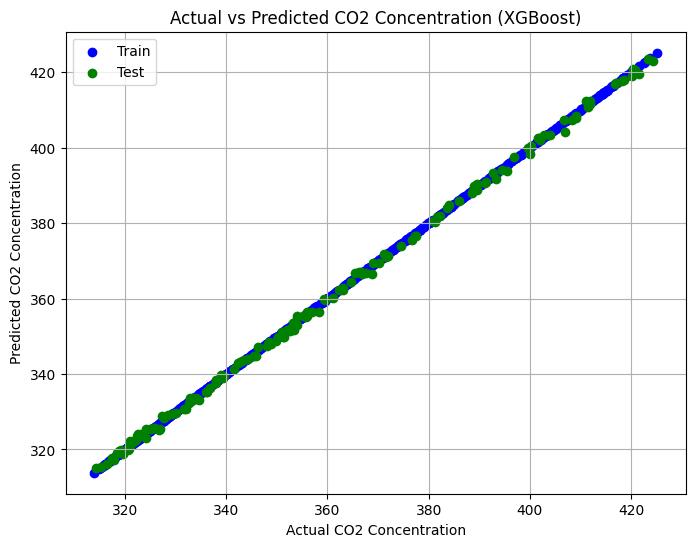

In [42]:
plt.figure(figsize=(8, 6))
plt.scatter(y_train, xgb_train_prediction, label='Train', color='blue')
plt.scatter(y_test, xgb_test_prediction, label='Test', color='green')
plt.xlabel('Actual CO2 Concentration')
plt.ylabel('Predicted CO2 Concentration')
plt.title('Actual vs Predicted CO2 Concentration (XGBoost)')
plt.legend()
plt.grid(True)
plt.show()

In [43]:
mape_train_xgb = mean_absolute_percentage_error(y_train, xgb_train_prediction) * 100
mape_train_xgb

0.001727635729388901

In [44]:
mape_test_xgb = mean_absolute_percentage_error(y_test, xgb_test_prediction) * 100
mape_test_xgb

0.19265273921441836

In [45]:
n_lag = 12
test_prediction_xgb = []
current_batch = get_first_eval_batch(train['CO2'].values, n_lag)
for i in range(len(test)):
    current_pred = xgb.predict(current_batch)[0]
    test_prediction_xgb.append(current_pred)
    current_batch = np.append(current_batch[:, 1:], current_pred).reshape(-1, n_lag)

<Axes: >

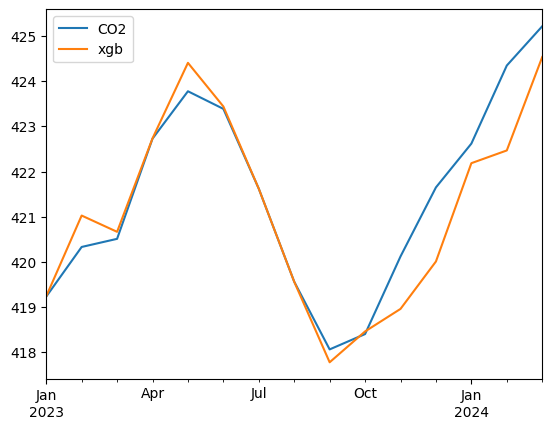

In [46]:
df_comp = test['CO2'].to_frame()
df_comp['xgb'] = test_prediction_xgb
df_comp.dropna(inplace=True)
df_comp.plot()

In [47]:
mape_comp_xgb = mean_absolute_percentage_error(df_comp['CO2'], df_comp['xgb']) * 100
mape_comp_xgb

0.12139906420271344

# Mean Absolute Percentage Error Comparison

In [48]:
print('Random Forest Regressor')
print(f'Train: {mape_train_rfr}')
print(f'Test: {mape_test_rfr}')
print(f'Comp: {mape_comp_rfr}')

Random Forest Regressor
Train: 0.052827178953893855
Test: 0.14478134364432446
Comp: 0.16520692484916563


In [49]:
print('Gradient Boosting Regressor')
print(f'Train: {mape_train_gb}')
print(f'Test: {mape_test_gb}')
print(f'Comp: {mape_comp_gb}')

Gradient Boosting Regressor
Train: 0.06522044402028436
Test: 0.18483843502553807
Comp: 0.13508168094769582


In [50]:
print('XGBoost Regressor')
print(f'Train: {mape_train_xgb}')
print(f'Test: {mape_test_xgb}')
print(f'Comp: {mape_comp_xgb}')

XGBoost Regressor
Train: 0.001727635729388901
Test: 0.19265273921441836
Comp: 0.12139906420271344


In [51]:
models = ['Random Forest', 'Gradient Boosting', 'XGBoost']
train_mape = [mape_train_rfr, mape_test_rfr, mape_comp_rfr]
test_mape = [mape_train_gb, mape_test_gb, mape_comp_gb]
comp_mape = [mape_train_xgb, mape_test_xgb, mape_comp_xgb]

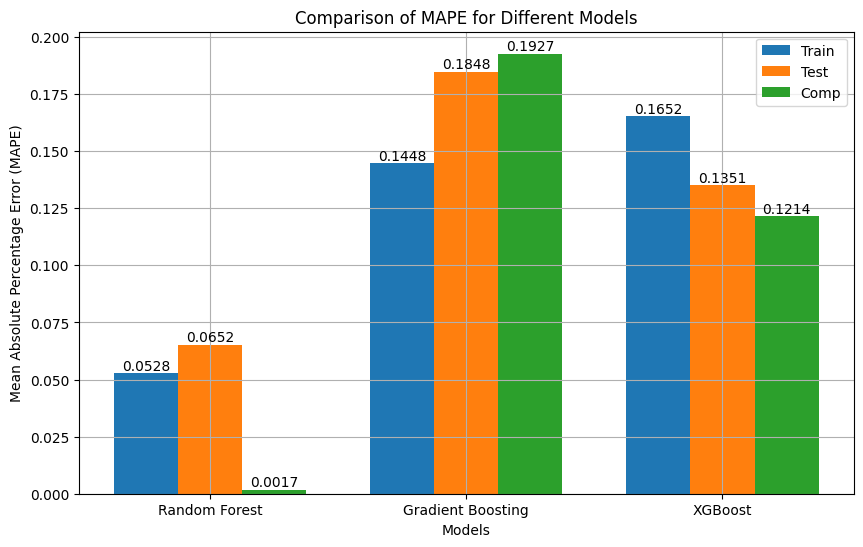

In [53]:
plt.figure(figsize=(10, 6))
bar_width = 0.25
index = range(len(models))
plt.bar(index, train_mape, bar_width, label='Train')
plt.bar([i + bar_width for i in index], test_mape, bar_width, label='Test')
plt.bar([i + 2 * bar_width for i in index], comp_mape, bar_width, label='Comp')

plt.xlabel('Models')
plt.ylabel('Mean Absolute Percentage Error (MAPE)')
plt.title('Comparison of MAPE for Different Models')
plt.xticks([i + bar_width for i in index], models)
plt.legend()

for i in index:
    plt.text(i, train_mape[i], f'{train_mape[i]:.4f}', ha='center', va='bottom')
    plt.text(i + bar_width, test_mape[i], f'{test_mape[i]:.4f}', ha='center', va='bottom')
    plt.text(i + 2 * bar_width, comp_mape[i], f'{comp_mape[i]:.4f}', ha='center', va='bottom')

plt.grid(True)
plt.show()